In [0]:
import tensorflow as tense
import numpy as np
import matplotlib.pyplot as plt

In [0]:
x_train = np.asarray([14,20,22,30,34,35,40,41,45,46,52])

In [0]:
y_train=np.asarray([78,84,84,88,78,87,92,108,98,87,80])

In [0]:
plt.scatter(x_train, y_train) 
plt.xlabel('x') 
plt.xlabel('y') 
plt.title("Training Data") 
plt.show() 

In [0]:
x_tf = tense.placeholder("float")
y_tf = tense.placeholder("float")

In [206]:
W = tense.Variable(np.random.randn(), name="weight")
b = tense.Variable(np.random.randn(), name="bias")
print(W)

<tf.Variable 'weight_21:0' shape=() dtype=float32_ref>


In [0]:
prediction = tense.add(tense.multiply(x_tf, W), b)

In [0]:
display_steps = 30
learning_rate = 0.008
train_epochs = 5000

In [0]:
cost = tense.reduce_sum(tense.pow(prediction-y_tf, 2))/(2*x_train.shape[0])  # x_train.shape[0] is the total number of training examples

In [0]:
optimizer = tense.train.GradientDescentOptimizer(learning_rate).minimize(cost)

In [0]:
init = tense.global_variables_initializer()

Epoch: 0030 cost= 1116.168701172 W= 1.199292 b= 0.8856487
Epoch: 0060 cost= 1079.282592773 W= 1.1707063 b= 2.615949
Epoch: 0090 cost= 1043.744995117 W= 1.1426672 b= 4.3131604
Epoch: 0120 cost= 1009.506225586 W= 1.1151637 b= 5.977911
Epoch: 0150 cost= 976.516357422 W= 1.0881869 b= 7.6108284
Epoch: 0180 cost= 944.730957031 W= 1.0617257 b= 9.2125025
Epoch: 0210 cost= 914.104064941 W= 1.0357704 b= 10.783556
Epoch: 0240 cost= 884.592163086 W= 1.0103116 b= 12.324578
Epoch: 0270 cost= 856.154968262 W= 0.98533976 b= 13.836122
Epoch: 0300 cost= 828.752319336 W= 0.9608452 b= 15.318757
Epoch: 0330 cost= 802.345520020 W= 0.9368191 b= 16.773045
Epoch: 0360 cost= 776.897644043 W= 0.9132522 b= 18.199537
Epoch: 0390 cost= 752.373168945 W= 0.89013594 b= 19.598753
Epoch: 0420 cost= 728.738586426 W= 0.8674624 b= 20.971178
Epoch: 0450 cost= 705.960937500 W= 0.84522235 b= 22.317348
Epoch: 0480 cost= 684.007324219 W= 0.8234077 b= 23.637787
Epoch: 0510 cost= 662.847961426 W= 0.8020104 b= 24.93297
Epoch: 0540

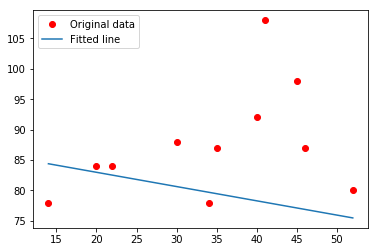

In [212]:
with tense.Session() as sess:
    sess.run(init)

    for epoch in range(train_epochs):

        if (epoch+1) % display_steps == 0:
            c = sess.run(cost, feed_dict={x_tf: x_train, y_tf:y_train})
            print("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(c), \
                "W=", sess.run(W), "b=", sess.run(b))
            
        for (x, y) in zip(x_train, y_train):
            sess.run(optimizer, feed_dict={x_tf: x, y_tf: y})

        
    print("Optimization completed.")
    training_cost = sess.run(cost, feed_dict={x_tf: x_train, y_tf: y_train})
    print("Training cost=", training_cost, "W=", sess.run(W), "b=", sess.run(b), '\n')

    plt.plot(x_train, y_train, 'ro', label='Original data')
    plt.plot(x_train, sess.run(W) * x_train + sess.run(b), label='Fitted line')
    plt.legend()
    plt.show()



